In [10]:
# LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# DATA
cr_loan = pd.read_csv("cr_loan2.csv")
cr_loan_nout = pd.read_csv("cr_loan_nout_nmiss.csv")
cr_loan_w = pd.read_csv("cr_loan_w2.csv")

# Exploración y preparación de datos de préstamo

## Qué es riesgo crediticio
El riesgo crediticio es el riesgo de que alguien que ha pedido dinero prestado no lo devuelva en su totalidad. Piense en este riesgo como la diferencia entre prestarle dinero a una persona y comprar un bono del gobierno. Con los bonos del gobierno, está casi garantizado que se devolverá el dinero, pero no cuando se presta dinero a personas. Un préstamo está en mora cuando la agencia crediticia está razonablemente segura de que el préstamo no se devolverá. Usaremos modelos de aprendizaje automático para determinar esto.

Consideremos este ejemplo: hemos prestado 300 dólares a alguien que ha realizado dos pagos, pero no el pago final. Es en este punto que consideramos que el préstamo está en **mora**. Predecir esto de antemano nos resulta útil para estimar la pérdida esperada.

### Pérdida esperada
La pérdida esperada es la cantidad que la empresa pierde como resultado del impago de un préstamo. La pérdida esperada es un cálculo simple de los siguientes tres componentes: 
- **La probabilidad de impago (PD)**, que es la probabilidad de que alguien incumpla con el pago de un préstamo;
- **la exposición en caso de impago (EAD)**, que es el monto pendiente en el momento del impago; y
- **la pérdida en caso de impago (LGD)**, que es la relación entre la exposición y cualquier recuperación de la pérdida.

En nuestro ejemplo, los 100 dólares que se nos debían son nuestra exposición (EAD), y si vendemos esa deuda por 20 dólares, nuestra pérdida en caso de impago (LGD) sería del 80 por ciento. La fórmula para la pérdida esperada es la probabilidad de impago multiplicada por la exposición en caso de impago y la pérdida en caso de impago. Acá nos centrarémos en la probabilidad de impago (PD).
$$\text{Pérdida esperada} = PD\cdot EAD \cdot LGD$$

### Tipos de datos utilizados
Para modelar la probabilidad de impago, generalmente disponemos de dos tipos de datos principales. 
1. **Datos de solicitud**: que son datos que están directamente relacionados con la solicitud de préstamo, como la calificación crediticia.
2. **Datos de comportamiento**, que describen al beneficiario del préstamo, como la duración del empleo.

Los datos que utilizaremos para nuestras predicciones de probabilidad de impago incluyen una combinación. Esto es importante porque los datos de la aplicación por sí solos no son tan buenos como los datos de la aplicación y del comportamiento juntos. Se incluyen dos columnas que emulan los datos que se pueden comprar en las agencias de crédito. La adquisición de datos externos es una práctica común en la mayoría de las organizaciones. Estas son las columnas disponibles en el conjunto de datos. Algunos ejemplos son:
- ingresos personales,
- porcentaje del monto del préstamo respecto de los ingresos de la persona y
- duración del historial crediticio.

Considere el porcentaje de ingresos. Esto podría afectar el estado del préstamo si el monto del préstamo es mayor que sus ingresos, porque es posible que no puedan afrontar los pagos.

### Exploración con tablas cruzadas
Nuestros datos tienen 32 mil filas, por lo que puede resultar difícil verlas todas a la vez. Aquí es donde usamos tablas cruzadas con la función de tabla cruzada disponible en Pandas. Podemos usar esta función para obtener una vista general de los datos similar a las tablas dinámicas de Excel. Aquí, vemos que los datos se han agrupado por estado del préstamo y propiedad de la vivienda, y luego se ha calculado la tasa de interés promedio.

In [9]:
# Tablas cruzadas
pd.crosstab(cr_loan['person_home_ownership'],
            cr_loan['loan_status'], 
            values=cr_loan['loan_int_rate'],
            aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


Además de utilizar tablas cruzadas, podemos explorar el conjunto de datos visualmente. Aquí, utilizamos matplotlib para crear un gráfico de dispersión de la tasa de interés del préstamo y los ingresos del beneficiario. Al igual que la tabla cruzada, los gráficos nos ayudan a obtener una vista general de nuestros datos.

Así pues, hemos definido el riesgo crediticio y los componentes de la pérdida esperada, así como los métodos para explorar los datos de riesgo crediticio con la intención de estimar la probabilidad de impago. 

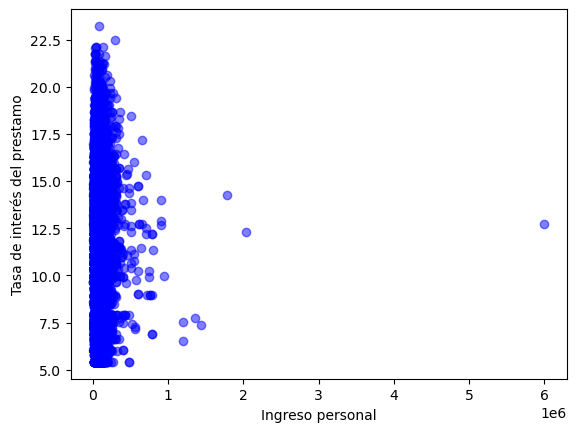

In [11]:
plt.scatter(cr_loan['person_income'], cr_loan['loan_int_rate'], 
            c='blue', alpha=0.5)
plt.xlabel('Ingreso personal')
plt.ylabel('Tasa de interés del prestamo')
plt.show()

### Ejercicio

#### Explora los datos crediticios
Comience por observar el conjunto de datos `cr_loan`. En este conjunto de datos, 'loan_status` se muestra si el préstamo se encuentra actualmente en mora, siendo $1$ el valor en mora y $0$ el valor en no mora.

Tiene más columnas dentro de los datos y muchas podrían tener una relación con los valores en `loan_status`. Debe explorar los datos y estas relaciones más a fondo con un análisis más profundo para comprender el impacto de los datos en los incumplimientos de los préstamos de crédito.

Comprobar la estructura de los datos nos ayuda a entender mejor qué hay dentro del conjunto. De manera similar, las visualizaciones proporcionan una vista general de los datos, además de tendencias y patrones importantes.

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D

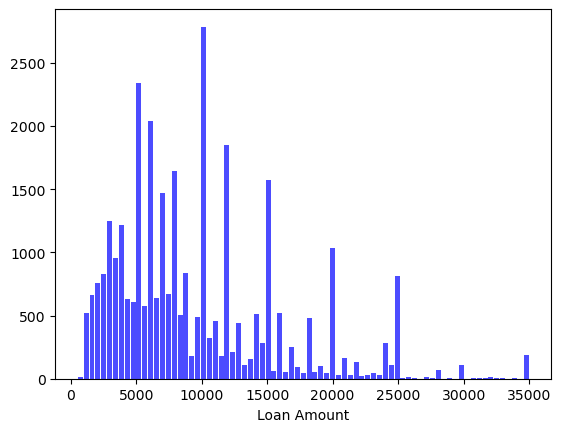

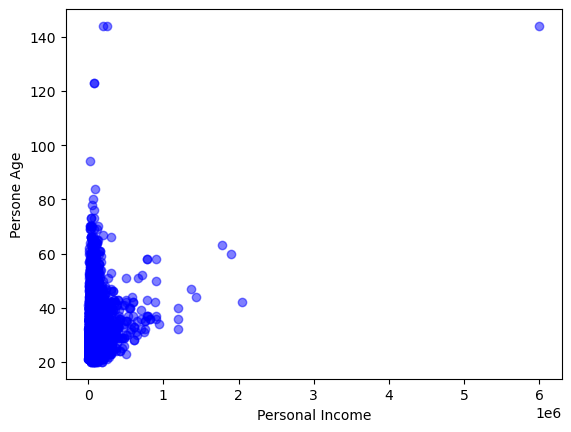

In [14]:
# Imprimir la estructura de los datos cr_loan.
print(cr_loan.dtypes)

# Mirar las primeras cinco filas de datos.
print(cr_loan.head())

# Dibujar un histograma de monto de prestamo
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

# Crear un diagrama de dispersión de los ingresos y la edad de una persona. 
# En este caso, los ingresos son la variable independiente y la edad es la variable dependiente.
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Ingreso de la persona')
plt.ylabel('Edad de la persona')
plt.show()

#### Crosstab y tablas dinámicas
A menudo, los datos financieros se ven como una tabla dinámica en hojas de cálculo como Excel.

Con las tablas cruzadas, se obtiene una vista de alto nivel de las columnas seleccionadas e incluso una agregación como un recuento o un promedio. Para la mayoría de los modelos de riesgo crediticio, especialmente para la probabilidad de incumplimiento, las columnas como `person_emp_length` y `person_home_ownership`son comunes para comenzar a investigar.

Podrás ver cómo se completan los valores en los datos y visualizarlos. Por ahora, debes comprobar cómo `loan_status` se ven afectados por factores como el estado de propiedad de la vivienda, la calificación crediticia y el porcentaje del préstamo sobre los ingresos.

In [15]:
# Crear una tabla cruzada de loan_intent y loan_status.
print(pd.crosstab(cr_loan['loan_intent'], 
                  cr_loan['loan_status'], 
                  margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [17]:
# Crear una tabla cruzada de propiedad de vivienda agrupada por loan_status y loan_grade.
print(pd.crosstab(cr_loan['person_home_ownership'],
                  [cr_loan['loan_status'],
                   cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [18]:
# Crear una tabla cruzada de propiedad de vivienda, estado del préstamo y promedio loan_percent_income.
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


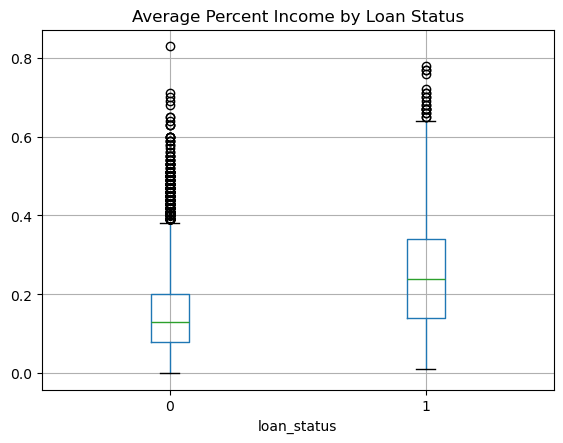

In [19]:
# Crear un diagrama de caja del porcentaje del préstamo sobre los ingresos de la persona agrupado por loan_status.
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

## Valores atípicos en los datos crediticios
Ahora que hemos realizado una exploración básica de los datos, observemos más de cerca algunas de las columnas y comencemos a prepararlas para el modelado.

Al igual que con cualquier problema de aprendizaje automático, **la preparación de los datos es el primer paso**. Pero, ¿por qué? Cuando nuestros datos están preparados correctamente, reducimos el tiempo de entrenamiento de nuestros modelos de aprendizaje automático. Además, los datos preparados también pueden tener un impacto positivo en el rendimiento de nuestro modelo. Esto es importante porque queremos que nuestros modelos predigan los valores predeterminados correctamente con la mayor frecuencia posible. Considere este gráfico ROC. Este muestra la precisión de tres modelos diferentes en los mismos datos a lo largo de diferentes etapas de procesamiento. La línea azul claro representa un modelo entrenado con datos ordenados y preparados, mientras que la línea naranja representa el modelo entrenado con datos sin procesar. La línea azul claro representa el modelo más preciso, porque la curva está más cerca de la esquina superior izquierda. Veremos más gráficos como este más adelante cuando verifiquemos la precisión de nuestros modelos.

### Valores atípicos y rendimiento
El primer tipo de preparación que analizaremos es la detección y eliminación de valores atípicos. Lamentablemente, es bastante común que los sistemas de ingreso de datos produzcan datos incorrectos. Si el especialista en ingreso de datos estaba cansado o distraído, puede ingresar valores incorrectos en nuestro sistema. También es posible que las herramientas de ingesta de datos creen valores erróneos en nuestros datos como resultado de problemas técnicos o fallas del sistema.

Si los datos de entrenamiento contienen valores atípicos, nuestros modelos predictivos tendrán dificultades para estimar parámetros como los coeficientes. Esto puede provocar que nuestros modelos no predigan tantos incumplimientos. Piense en los coeficientes como en la ponderación de cada columna o característica para determinar el estado del préstamo. Observe las diferencias de coeficientes en este ejemplo. Es posible que los valores atípicos en la tasa de interés puedan provocar que esa columna tenga una ponderación mucho mayor de lo normal. Esto afectará las predicciones.

| Característica | Coef con Outliers | Coef sin outliers |
|----------------|-------------------| ----------------- |
| Tasa de interés| 0.2         | 0.01 |
| Duración del empleo      | 0.5         | 0.6 |
| Ingreso | 0.6 | 0.75 |

Una forma de detectar valores atípicos es usar tablas cruzadas con funciones agregadas. Llamamos a la tabla cruzada sobre nuestros datos de préstamos de crédito como antes para encontrar la tasa de interés promedio. Para este ejemplo, podríamos esperar ver los valores a la izquierda con nuestros datos normales. Sin embargo, podría haber algunos valores atípicos extremos en los datos que darían como resultado los datos a la derecha. Esto causaría problemas con el modelado. ¡Imagínese tener una tasa de interés del 59,000 por ciento!



In [26]:
# Tablas cruzadas
pd.crosstab(cr_loan['person_home_ownership'],
            cr_loan['loan_status'], 
            values=cr_loan['loan_int_rate'],
            aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


In [27]:
# Tablas cruzadas
pd.crosstab(cr_loan_nout['person_home_ownership'],
            cr_loan_nout['loan_status'], 
            values=cr_loan_nout['loan_int_rate'],
            aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


Otra forma de detectar valores atípicos es utilizar elementos visuales. Para ello, podemos utilizar fácilmente gráficos como histogramas y diagramas de dispersión. 
Podemos ver que un par de registros tienen una antigüedad laboral de una persona superior a 100 años. Esto sugeriría que dos solicitantes de préstamos tienen más de 136 años. Esto, al menos por ahora, no es posible.

Entonces, sabemos que los valores atípicos son un problema y queremos eliminarlos, pero ¿cómo? Podemos usar fácilmente el método drop dentro del paquete pandas para eliminar filas de nuestros datos. En este ejemplo, primero usamos subconjuntos básicos de Python para encontrar filas con una duración de empleo de una persona mayor a 60. Lo que esto devuelve es la posición de índice de esa fila en nuestro marco de datos. A partir de ahí, llamamos al método drop en nuestro marco de datos para que elimine las filas en el marco de datos que coinciden con las posiciones de índice encontradas anteriormente. Ahora, podemos ver visualmente que los valores atípicos se han eliminado de acuerdo con nuestros criterios y los datos se ven mucho más realistas.

Aprendimos a encontrar y eliminar valores atípicos de nuestros datos.

### Ejercicio
#### Búsqueda de valores atípicos con tablas cruzadas
Ahora debe buscar y eliminar los valores atípicos que sospecha que pueden estar presentes en los datos. Para este ejercicio, puede utilizar tablas cruzadas y funciones de agregación.

Observa la columna `person_emp_length`. Ya has utilizado el argumento `aggfunc = 'mean'` para ver el promedio de una columna numérica, pero para detectar valores atípicos puedes utilizar otras funciones como `min` y `max`.

Puede que no sea posible que una persona tenga una duración de empleo menor a 0 o mayor a 60. ¡Puede usar tablas cruzadas para verificar los datos y ver si hay casos de este tipo!

El conjunto de datos `cr_loan` se ha cargado en el espacio de trabajo.

In [31]:
# Imprimir la tabla cruzada de loan_status y person_home_ownership con el máximo person_emp_length.
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max'))

# Crear una matriz de índices para registros con una longitud de empleo mayor a 60. Guárdelo como indices.

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
